In [2]:
import scipy.linalg as linalg
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import operator
import pandas as pd
import ssaCore

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [23]:
def getDif(F, Frest):
    perc = []
    for i in range(len(F)):
        a = F[i]
        b = Frest[i]
        perc.append(abs((a-b) / ((a+b)/2)))
    print("max",max(perc))
    print("min",min(perc))
    print("avr",sum(perc)/len(perc))

In [4]:
N = 300
L = 100 # Длинна гусеницы
K = N - L + 1 # Количество столбцов в траекторной матрице
t = np.arange(0,N)

In [5]:
trend = 0.08 * t
p1, p2 = 11, 8
periodic1 = 0.9 * np.sin(2*np.pi*t/p1)
periodic2 = 0.8 * np.sin(2*np.pi*(t+0.09)/p2)

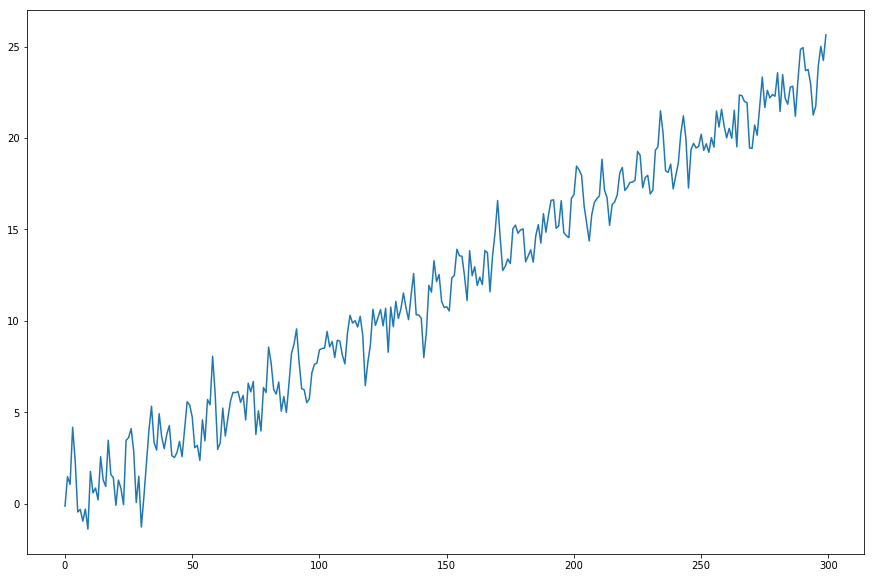

In [6]:
noise = np.random.normal(0, 0.8, N)

F = trend + periodic1 + periodic2 + noise
plt.plot(t, F)

In [7]:
ssa = ssaCore.mySSA(F[0:200])
ssa.decompose(L)
print(type(ssa.sContributions))
ssa.getComponents()
print(ssa.components)
ssa.filterComponents(0.0008)
print(ssa.components)

<class 'dict'>
[2, 3, 4, 5, 6, 7, 12, 13, 16, 17, 94, 95, 0, 1]
[0, 1, 2, 3, 4, 5]


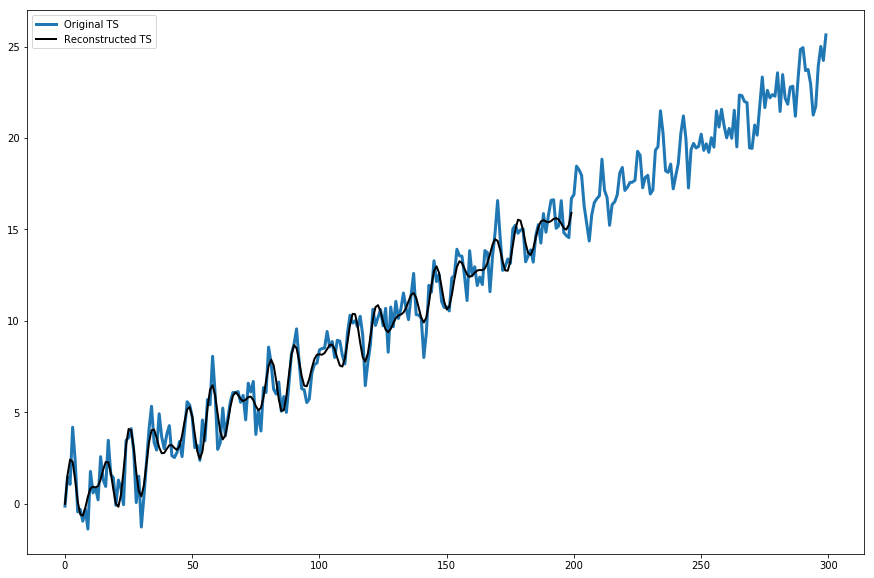

In [8]:
tsReconstruct = ssa.reconstruct()
tsn = np.arange(len(tsReconstruct))
plt.plot(t, F, linewidth = 3, label = "Original TS")
plt.plot(tsn, tsReconstruct, color = "black", linewidth = 2, label = "Reconstructed TS")
plt.legend()

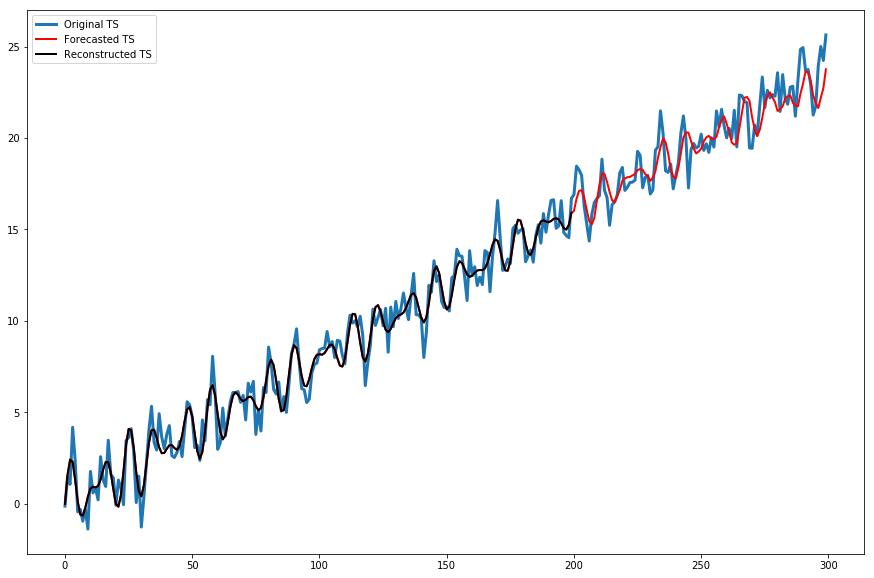

In [12]:
tsPredict = ssa.forecast(100)
tsn = np.arange(len(tsReconstruct))
plt.plot(t, F, linewidth = 3, label = "Original TS")
plt.plot(t, tsPredict, color = "red", linewidth = 2, label = "Forecasted TS")
plt.plot(tsn, tsReconstruct, color = "black", linewidth = 2, label = "Reconstructed TS")
plt.legend()

In [36]:
getDif(F[200:300], tsPredict[200:300])

max 0.03364606486924706
min 7.618226710644896e-05
avr 0.009514284301005675


In [25]:
N = 1000
L = 300 # Длинна гусеницы
K = N - L + 1 # Количество столбцов в траекторной матрице
t = np.arange(0,N)

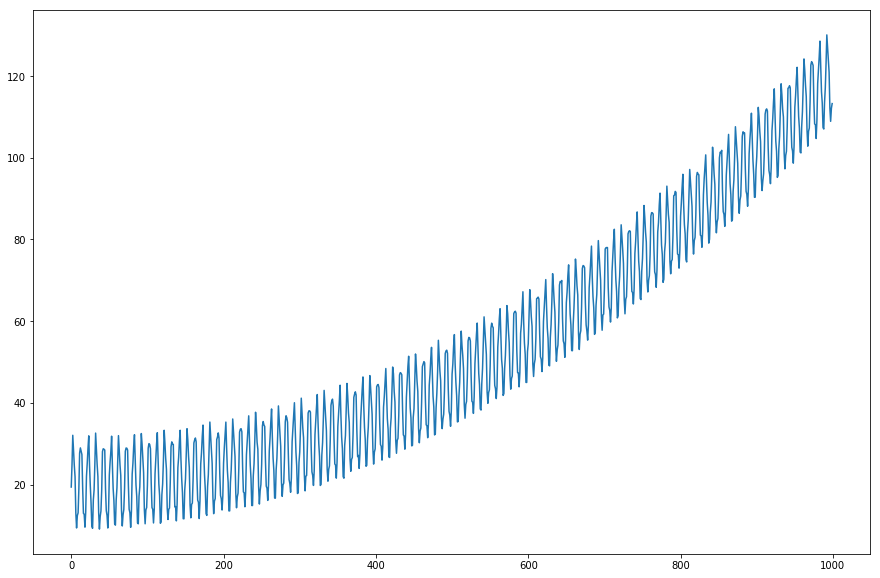

In [26]:
trend = 20 + 0.0001 * (t ** 2)
p1, p2 = 10, 3
periodic1 = 10 * np.sin(2*np.pi*t/p1)
periodic2 = 2 * np.cos(20*np.pi*(t-0.5)/p2)
noise = np.random.normal(0, 0.3, N)

F = trend + periodic1 + periodic2 + noise
plt.plot(t, F)

In [27]:
ssa = ssaCore.mySSA(F[0:700])
ssa.decompose(L)
print(type(ssa.sContributions))
ssa.getComponents()
print(ssa.components)
ssa.filterComponents(0.0008)
print(ssa.components)

<class 'dict'>
[10, 11, 12, 13, 18, 19, 20, 21, 24, 25, 34, 35, 60, 61, 64, 65, 68, 69, 92, 93, 106, 107, 112, 113, 114, 115, 122, 123, 130, 131, 132, 133, 162, 163, 166, 167, 184, 185, 186, 187, 234, 235, 244, 245, 250, 251, 270, 271, 292, 293, 294, 295, 296, 297, 298, 299, 0, 1]
[0, 1, 2, 3, 4, 5]


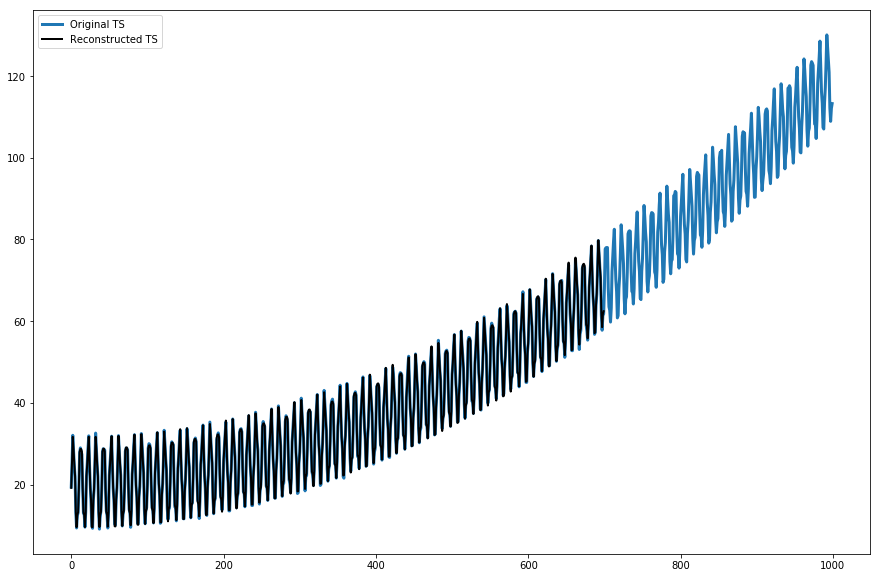

In [30]:
tsReconstruct = ssa.reconstruct()
tsn = np.arange(len(tsReconstruct))
plt.plot(t, F, linewidth = 3, label = "Original TS")
plt.plot(tsn, tsReconstruct, color = "black", linewidth = 2, label = "Reconstructed TS")
plt.legend()

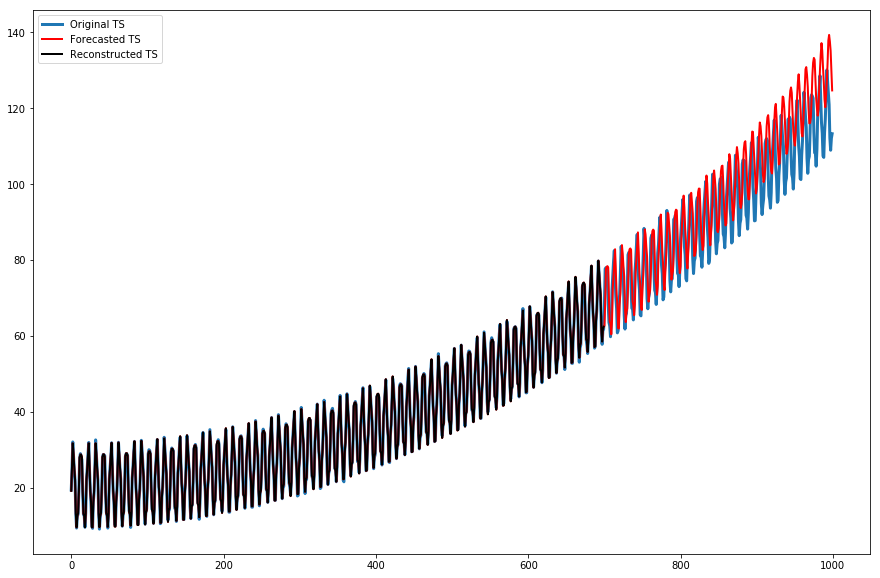

In [32]:
tsPredict = ssa.forecast(300)
tsn = np.arange(len(tsReconstruct))
plt.plot(t, F, linewidth = 3, label = "Original TS")
plt.plot(t, tsPredict, color = "red", linewidth = 2, label = "Forecasted TS")
plt.plot(tsn, tsReconstruct, color = "black", linewidth = 2, label = "Reconstructed TS")
plt.legend()

In [35]:
getDif(F[700:1000], tsPredict[700:1000])

max 0.2147407483905512
min 0.0008175198330887555
avr 0.07268952010948747


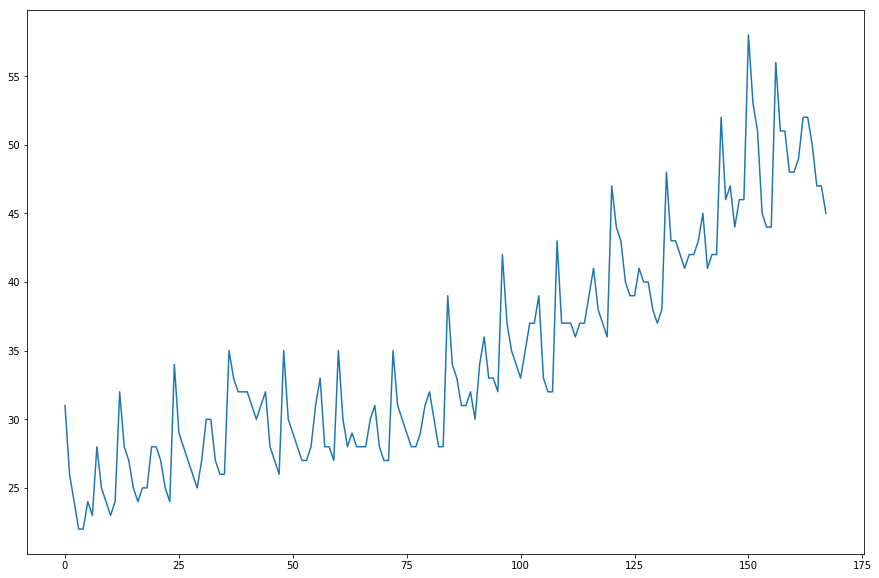

In [40]:
df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.columns = ['month', 'diet', 'gym', 'finance']
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
F = df["gym"]
N = len(F)
L = 70 
t = np.arange(0,N)
plt.plot(t, F)

In [62]:
ssa = ssaCore.mySSA(F)
ssa.decompose(L)
print(type(ssa.sContributions))
ssa.getComponents()
print(ssa.components)
ssa.filterComponents(0.0008)
print(ssa.components)

<class 'dict'>
[4, 5, 8, 9, 12, 13, 24, 25, 32, 33, 56, 57, 64, 65, 66, 67, 68, 69, 0, 1]
[0, 1, 2, 3, 4, 5, 6, 7]


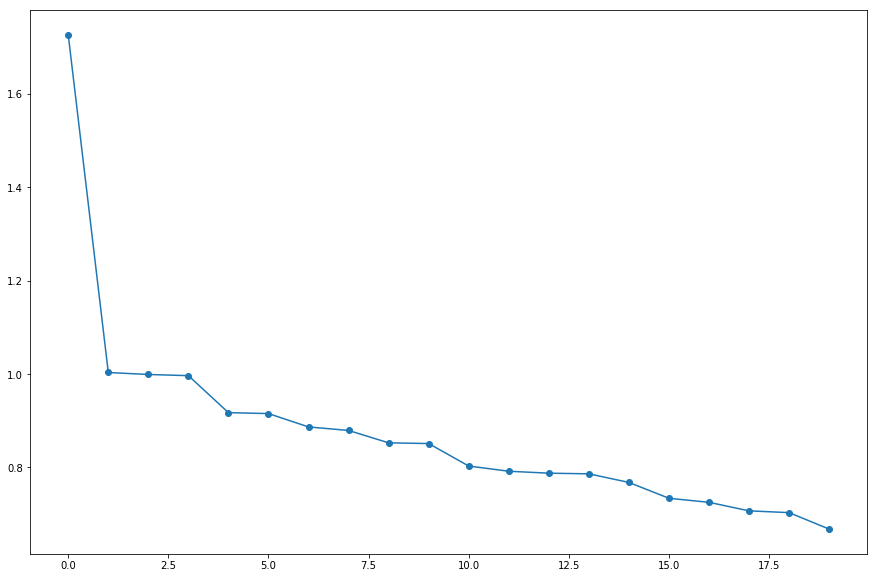

In [63]:
ln = np.array([np.log(ssa.s[i]) / np.log(100) for i in range(20)])
plt.plot(np.arange(len(ln)), ln, marker='o')

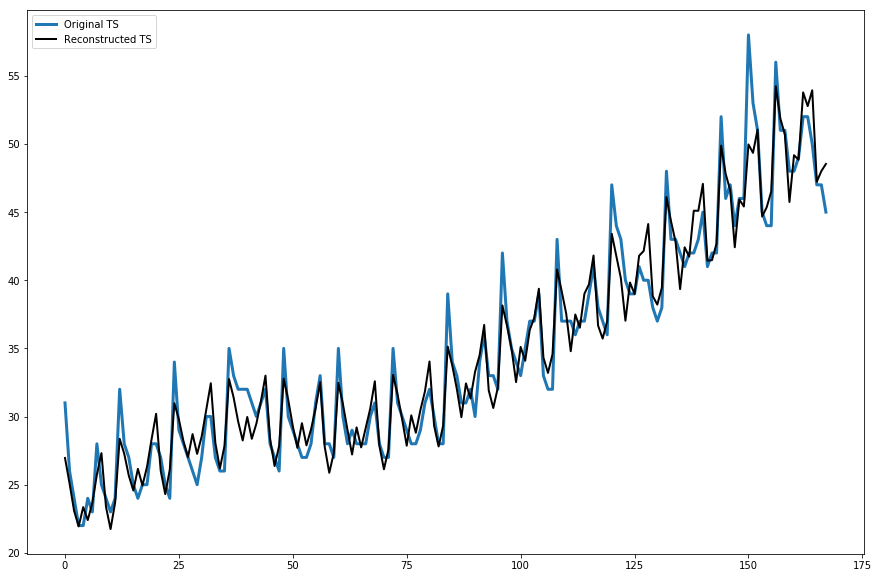

In [64]:
tsReconstruct = ssa.reconstruct()
tsn = np.arange(len(tsReconstruct))
plt.plot(t, F, linewidth = 3, label = "Original TS")
plt.plot(tsn, tsReconstruct, color = "black", linewidth = 2, label = "Reconstructed TS")
plt.legend()

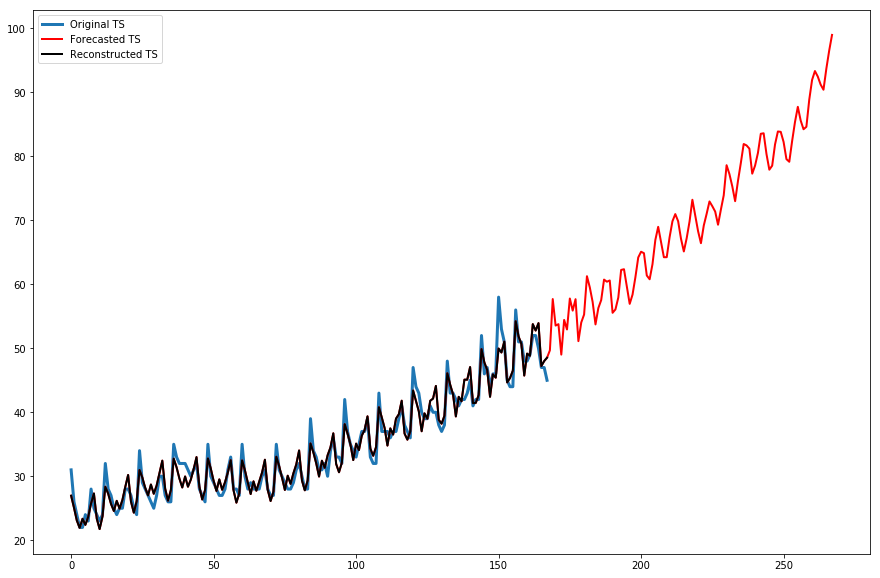

In [65]:
tsPredict = ssa.forecast(100)
tsn = np.arange(len(tsReconstruct))
plt.plot(t, F, linewidth = 3, label = "Original TS")
plt.plot(np.arange(len(tsPredict)), tsPredict, color = "red", linewidth = 2, label = "Forecasted TS")
plt.plot(tsn, tsReconstruct, color = "black", linewidth = 2, label = "Reconstructed TS")
plt.legend()

In [66]:
L = 50
ssa = ssaCore.mySSA(F[0:100])
ssa.decompose(L)
print(type(ssa.sContributions))
ssa.getComponents()
print(ssa.components)
ssa.filterComponents(0.0008)
print(ssa.components)

<class 'dict'>
[10, 11, 12, 13, 14, 15, 18, 19, 34, 35, 0, 1]
[0, 1, 2, 3, 4, 5, 6, 7]


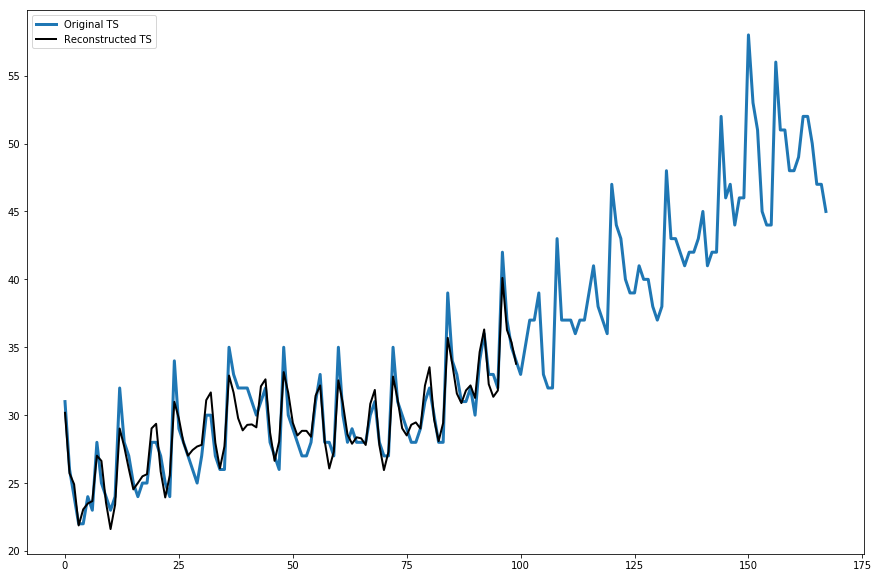

In [67]:
tsReconstruct = ssa.reconstruct()
tsn = np.arange(len(tsReconstruct))
plt.plot(t, F, linewidth = 3, label = "Original TS")
plt.plot(tsn, tsReconstruct, color = "black", linewidth = 2, label = "Reconstructed TS")
plt.legend()

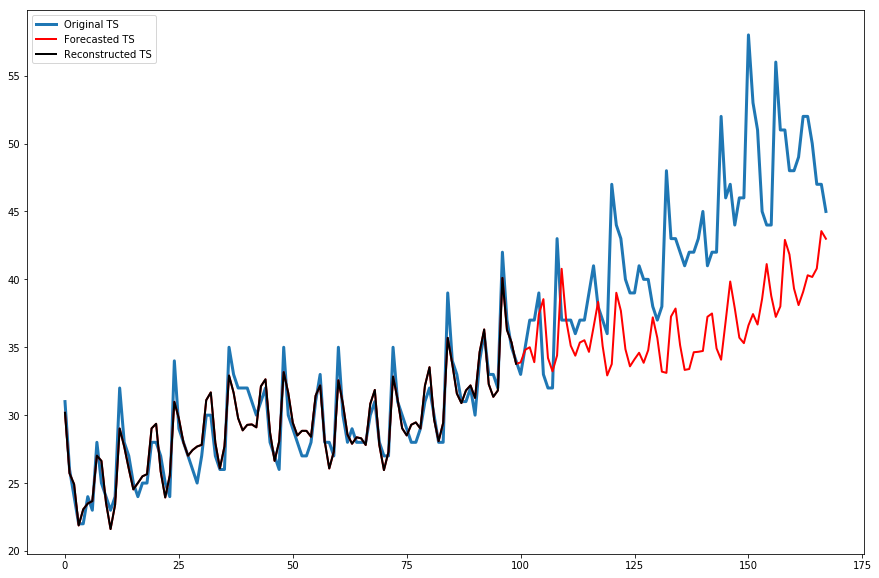

In [72]:
tsPredict = ssa.forecast(len(F) - 100)
tsn = np.arange(len(tsReconstruct))
plt.plot(t, F, linewidth = 3, label = "Original TS")
plt.plot(np.arange(len(tsPredict)), tsPredict, color = "red", linewidth = 2, label = "Forecasted TS")
plt.plot(tsn, tsReconstruct, color = "black", linewidth = 2, label = "Reconstructed TS")
plt.legend()

In [73]:
getDif(F, tsPredict)

max 0.45221062268437234
min 0.0003420206767366905
avr 0.08460230937084011
